**Nama : Muhammad Bagus Indrawan**

**Kelas : TI-3A/20**

**NIM : 2241720217**

# MODUL 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection

## PRAKTIKUM FILTER
1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.  
2. Berikut merupakan langkah-langkah yang dapat dilakukan:

  a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.
  
  b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

  c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

In [3]:
# Fungsi untuk menambahkan padding pada citra dengan nilai konstan
def add_padding(image, pad):
    return np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)

# Fungsi untuk melakukan operasi konvolusi 2D tanpa menggunakan library OpenCV
def convolution2d(image, kernel, stride=1, padding=0):
    # Jika padding lebih dari 0, tambahkan padding pada citra
    if padding > 0:
        image = add_padding(image, padding)

    # Mendapatkan ukuran/dimensi citra dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Menghitung dimensi output setelah operasi konvolusi
    output_height = ((image_height - kernel_height) // stride) + 1
    output_width = ((image_width - kernel_width) // stride) + 1

    # Membuat matriks kosong untuk menampung hasil konvolusi
    output = np.zeros((output_height, output_width))

    # Melakukan operasi konvolusi dengan memindahkan kernel di atas citra
    for i in range(0, output_height):
        for j in range(0, output_width):
            # Mendapatkan bagian citra yang akan dikalikan dengan kernel
            region = image[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width]
            # Mengalikan elemen-elemen kernel dengan bagian citra, lalu menjumlahkannya
            output[i, j] = np.sum(region * kernel)

    # Normalisasi hasil konvolusi agar tetap berada dalam rentang 0-255
    output = np.clip(output, 0, 255)

    return output.astype(np.uint8)  # Mengembalikan hasil dalam format 8-bit (grayscale)

  d. Load citra yang akan diproses dan ubah menjadi citra keabuan

In [4]:
img = cv.imread('/content/drive/MyDrive/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

  e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut

In [5]:
sharpen = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])

  f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya

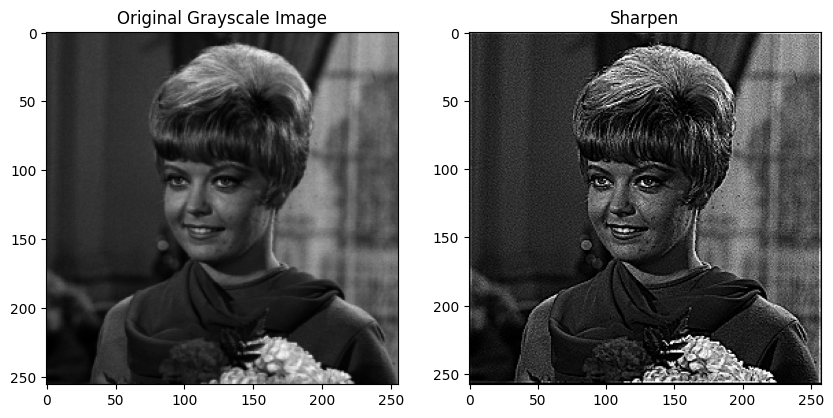

In [6]:
result = convolution2d(img_gray, sharpen, stride=1, padding=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Sharpen')
plt.imshow(result, cmap='gray')
plt.show()

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut



### Average Filter

In [7]:
average = np.ones((3, 3), np.float32) / 9

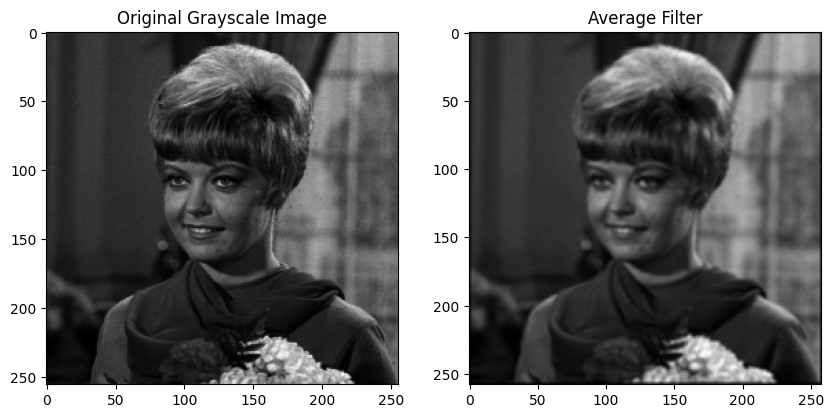

In [8]:
result = convolution2d(img_gray, average, stride=1, padding=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Average Filter')
plt.imshow(result, cmap='gray')
plt.show()

### Low Pass Filter

In [9]:
low_pass = np.array([[1, 1, 1],
                     [1, 4, 1],
                     [1, 1, 1]]) / 12

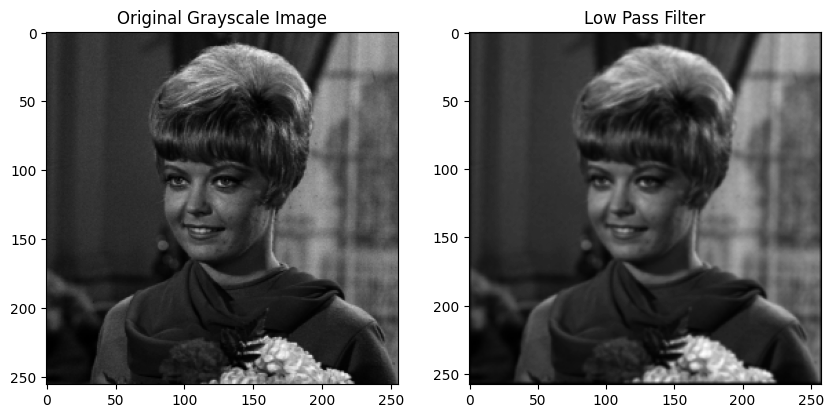

In [10]:
result = convolution2d(img_gray, low_pass, stride=1, padding=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Low Pass Filter')
plt.imshow(result, cmap='gray')
plt.show()

### High Pass Filter

In [11]:
high_pass = np.array([[-1, 0, 1],
                      [-1, 0, 3],
                      [-3, 0, 1]])

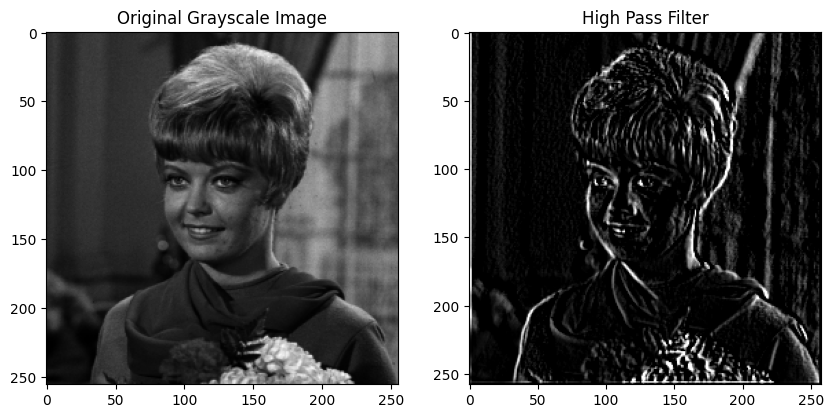

In [12]:
result = convolution2d(img_gray, high_pass, stride=1, padding=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('High Pass Filter')
plt.imshow(result, cmap='gray')
plt.show()

### Sharpen

In [13]:
sharpen = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])

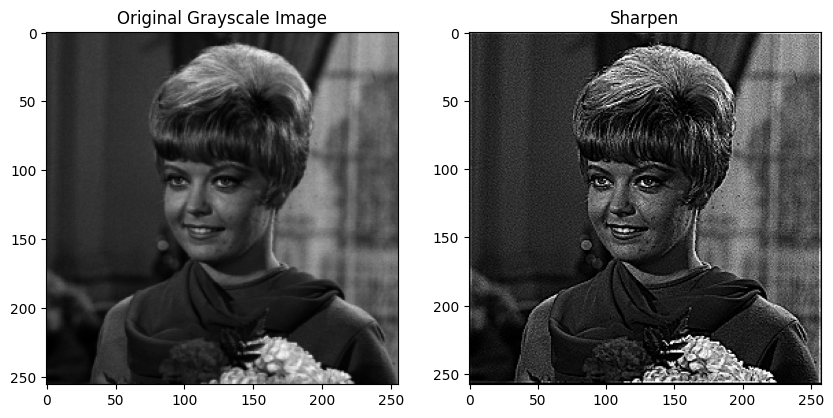

In [14]:
result = convolution2d(img_gray, sharpen, stride=1, padding=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Sharpen')
plt.imshow(result, cmap='gray')
plt.show()

### Emboss

In [15]:
emboss = np.array([[-2,-1,0],
                   [-1,1,1],
                   [0,1,2]])

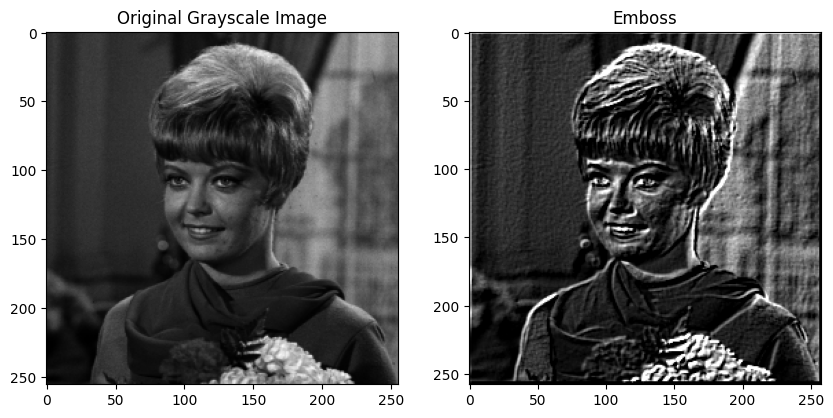

In [16]:
result = convolution2d(img_gray, emboss, stride=1, padding=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Emboss')
plt.imshow(result, cmap='gray')
plt.show()

### Left Sobel Edge Detection

In [17]:
lsed = np.array([[1,0,-1],
                 [2,0,-2],
                 [1,0,-1]])

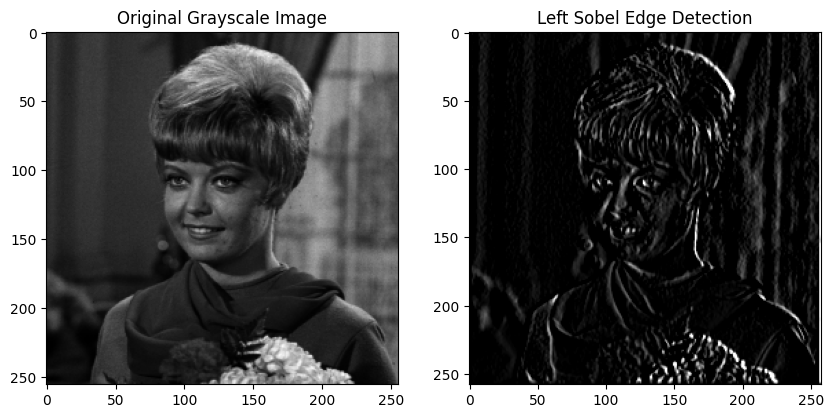

In [18]:
result = convolution2d(img_gray, lsed, stride=1, padding=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Left Sobel Edge Detection')
plt.imshow(result, cmap='gray')
plt.show()

### Canny Edge Detection

In [19]:
ced = np.array([[-1,-1,-1],
                [-1,8,-1],
                [-1,-1,-1]])

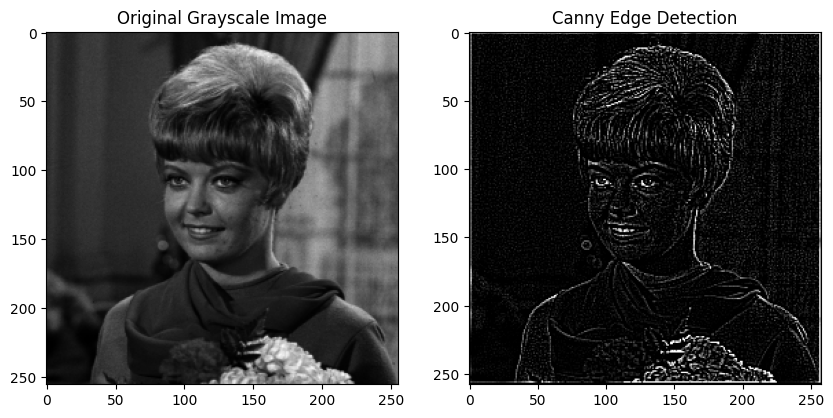

In [20]:
result = convolution2d(img_gray, ced, stride=1, padding=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Canny Edge Detection')
plt.imshow(result, cmap='gray')
plt.show()

### Prewitt Edge Detection

In [21]:
ped = np.array([[1,1,1],
                [0,0,0],
                [-1,-1,-1]])

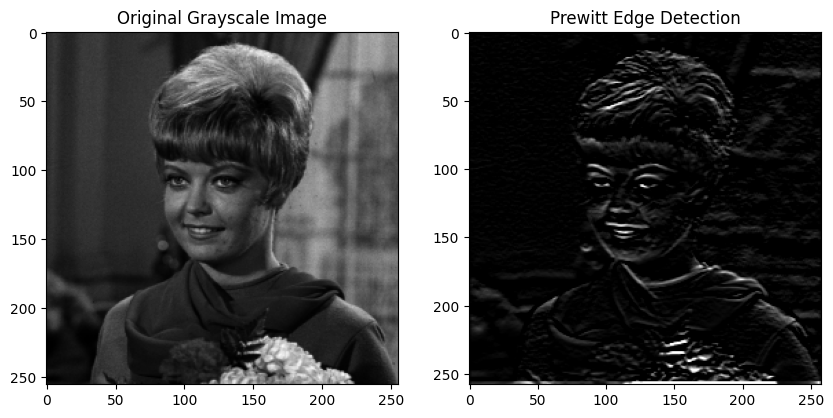

In [22]:
result = convolution2d(img_gray, ped, stride=1, padding=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Prewitt Edge Detection')
plt.imshow(result, cmap='gray')
plt.show()

### 5x5 Gaussian Blur

In [23]:
gaussian5x5 = np.array([[1,4,6,4,1],
                        [4,16,24,16,4],
                        [6,24,36,24,6],
                        [4,16,24,16,4],
                        [1,4,6,4,1]]) / 256

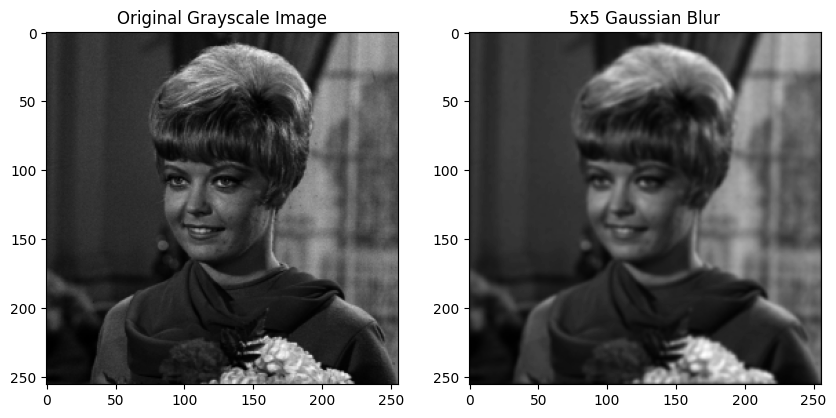

In [24]:
result = convolution2d(img_gray, gaussian5x5, stride=1, padding=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('5x5 Gaussian Blur')
plt.imshow(result, cmap='gray')
plt.show()

### 21x21 Gaussian Blur

In [25]:
kernel_size = 21
sigma = math.sqrt(kernel_size)

gaussian_1d = cv.getGaussianKernel(kernel_size, sigma)
gaussian_2d = gaussian_1d @ gaussian_1d.T

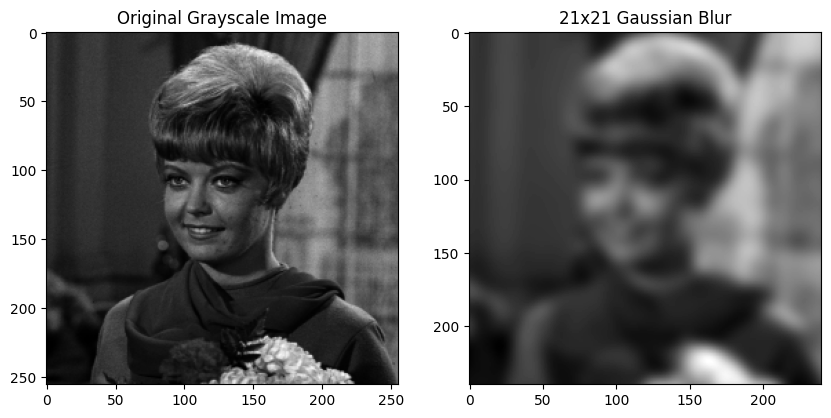

In [26]:
result = convolution2d(img_gray, gaussian_2d, stride=1, padding=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('21x21 Gaussian Blur')
plt.imshow(result, cmap='gray')
plt.show()